In [ ]:
import pandas as pd

df=pd.read_excel("/content/data.xlsx")


In [ ]:

del df['supplier_city']

del df['Device_name']

In [ ]:
df

,price,shipping_cost,total_price,shipping_time,availability,quality,supplier_name,supplier_country,supplier_feedback
0,100,3,103,3,100,1,Beurer,17,4.5
1,19,3,22,2,33,1,rhino power sales,17,5.0
2,30,0,30,1,124,1,amazon,17,5.0
3,20,0,20,2,26,1,amazon,17,4.0
4,20,5,25,2,196,3,ankovo,17,3.5
...,...,...,...,...,...,...,...,...,...
293,1200,100,1300,1,100,3,Zhi Ruo,11,2.0
294,650,200,850,1,50,1,Hui Yin,11,4.3
295,400,100,500,3,50,1,Hui Yin,11,4.7
296,150,50,200,2,100,1,Hui Yin,11,4.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


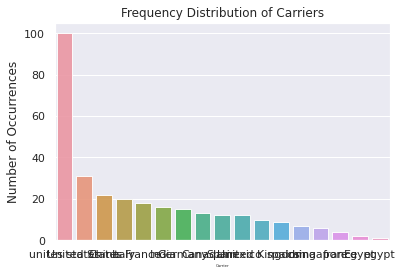

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df['supplier_country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=4)
plt.show()

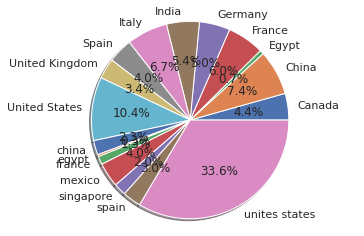

In [ ]:
labels = df['supplier_country'].astype('category').cat.categories.tolist()
counts = df['supplier_country'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
replace_map = {'supplier_country': {'unites states': 1,'United States': 1, 'China': 2, 'Italy': 3, 'France': 4,
                                  'India': 5, 'Germany': 6, 'Canada': 7 , 'mexico': 8 , 'Spain': 9,'United Kingdom': 10,'Span': 11
                           , 'china': 12, 'singapore': 13 , 'france': 14 , 'Egypt': 15,'egypt': 16,'Span': 17
                           
                           }}

In [ ]:
labels = df['supplier_country'].astype('category').cat.categories.tolist()
replace_map_comp = {'supplier_country' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'supplier_country': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17}}


In [ ]:
df.replace(replace_map_comp, inplace=True)

print(df.head())

   price  shipping_cost  ...  supplier_country  supplier_feedback
0    100              3  ...                17                4.5
1     19              3  ...                17                5.0
2     30              0  ...                17                5.0
3     20              0  ...                17                4.0
4     20              5  ...                17                3.5

[5 rows x 9 columns]


In [ ]:
df

,price,shipping_cost,total_price,shipping_time,availability,quality,supplier_name,supplier_country,supplier_feedback
0,100,3,103,3,100,1,Beurer,17,4.5
1,19,3,22,2,33,1,rhino power sales,17,5.0
2,30,0,30,1,124,1,amazon,17,5.0
3,20,0,20,2,26,1,amazon,17,4.0
4,20,5,25,2,196,3,ankovo,17,3.5
...,...,...,...,...,...,...,...,...,...
293,1200,100,1300,1,100,3,Zhi Ruo,11,2.0
294,650,200,850,1,50,1,Hui Yin,11,4.3
295,400,100,500,3,50,1,Hui Yin,11,4.7
296,150,50,200,2,100,1,Hui Yin,11,4.0


In [ ]:
df=pd.read_csv("/content/mydata.csv")
df

,Unnamed: 0,price,shipping_cost,total_price,shipping_time,availability,quality,supplier_country,supplier_feedback
0,0,100,3,103,3,100,1,17,4.5
1,1,19,3,22,2,33,1,17,5.0
2,2,30,0,30,1,124,1,17,5.0
3,3,20,0,20,2,26,1,17,4.0
4,4,20,5,25,2,196,3,17,3.5
...,...,...,...,...,...,...,...,...,...
293,293,1200,100,1300,1,100,3,12,2.0
294,294,650,200,850,1,50,1,12,4.3
295,295,400,100,500,3,50,1,12,4.7
296,296,150,50,200,2,100,1,12,4.0


In [ ]:
Y=df["quality"]
y=df["quality"]


In [ ]:
del df['quality']
X=df
X

,Unnamed: 0,price,shipping_cost,total_price,shipping_time,availability,supplier_country,supplier_feedback
0,0,100,3,103,3,100,17,4.5
1,1,19,3,22,2,33,17,5.0
2,2,30,0,30,1,124,17,5.0
3,3,20,0,20,2,26,17,4.0
4,4,20,5,25,2,196,17,3.5
...,...,...,...,...,...,...,...,...
293,293,1200,100,1300,1,100,12,2.0
294,294,650,200,850,1,50,12,4.3
295,295,400,100,500,3,50,12,4.7
296,296,150,50,200,2,100,12,4.0


In [ ]:
#----------------------------------------------------
#Import Libraries
from sklearn.model_selection import train_test_split
#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

In [56]:
# Import Libraries
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [ ]:
#----------------------------------------------------
#Import Libraries
from sklearn.svm import SVC
#----------------------------------------------------
#Applying SVC Model 

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=0.9,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

SVCModel Train Score is :  0.9957983193277311
SVCModel Test Score is :  0.55
Predicted Value for SVCModel is :  ['1' '1' '2' '1' '1' '1' '1' '1' '1' '1']


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [66]:
pred_y = SVCModel.predict(X_test)
pred_y

array(['1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1'], dtype=object)

In [ ]:


pred_y = SVCModel.predict(X_test)

accuracy = accuracy_score(y_test, pred_y)
#recall=precision_recall_fscore_support(train_y, pred_y)
average_precision = average_precision_score(y_test, pred_y)
average_recall= recall_score(y_test, pred_y, average='macro')

print('Average precision-recall score: {0:0.2f}'.format(average_precision),l)
print( 'Accuracy', accuracy,'precision',average_precision,'recall',average_recall)


In [70]:
# Import Libraries
from sklearn.metrics import f1_score
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
#----------------------------------------------------
pred_y = SVCModel.predict(X_test)

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, pred_y, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.55


Confusion Matrix is : 
 [[32  0  0]
 [13  1  0]
 [14  0  0]]


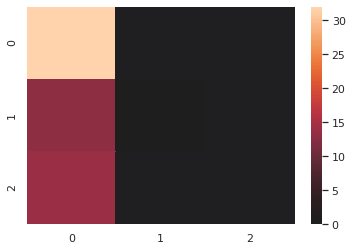

Accuracy Score is :  33
F1 Score is :  0.55
Recall Score is :  0.55
Precision Score is :  0.55
Precision Recall Score is :  (0.55, 0.55, 0.55, None)


In [72]:
#----------------------------------------------------
y_pred = SVCModel.predict(X_test)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

#----------------------------------------------------
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

#----------------------------------------------------
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

#----------------------------------------------------
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

#----------------------------------------------------
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

In [ ]:
#----------------------------------------------------
#Import Libraries
from sklearn.tree import DecisionTreeClassifier
#----------------------------------------------------
#Applying DecisionTreeClassifier Model 

'''
sklearn.tree.DecisionTreeClassifier(criterion='gini’, splitter=’best’, max_depth=None,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                    min_impurity_split=None, class_weight=None,presort=False)
'''

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)
#print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.9831932773109243
DecisionTreeClassifierModel Test Score is :  0.9166666666666666
DecisionTreeClassifierModel Classes are :  ['1' '2' '3' 'goog']
DecisionTreeClassifierModel feature importances are :  [0.08761719 0.06113662 0.         0.03763688 0.00138276 0.05622362
 0.08715564 0.66884729]


Confusion Matrix is : 
 [[29  0  2  1]
 [ 0 14  0  0]
 [ 2  0 12  0]
 [ 0  0  0  0]]


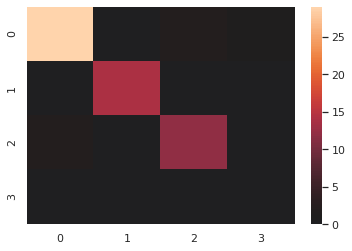

Accuracy Score is :  55
F1 Score is :  0.9166666666666666
Recall Score is :  0.9166666666666666
Precision Score is :  0.9166666666666666
Precision Recall Score is :  (0.9166666666666666, 0.9166666666666666, 0.9166666666666666, None)


In [73]:
#----------------------------------------------------
y_pred = DecisionTreeClassifierModel.predict(X_test)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

#----------------------------------------------------
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

#----------------------------------------------------
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

#----------------------------------------------------
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

#----------------------------------------------------
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

In [ ]:
print('Predicted Value for SVCModel is : ' , y_pred[:10])

Predicted Value for SVCModel is :  ['2' '3' '2' '3' '2' '1' '2' '1' '1' '1']


In [ ]:
import numpy as np

In [48]:
y_pred = DecisionTreeClassifierModel.predict(pd.DataFrame ([76,	0	,5,	1,124	,17,	5,7]).T)
y_pred


array(['goog'], dtype=object)